In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df= pd.read_csv(r"C:\Users\kache\Downloads\archive (2).zip")

In [4]:
# Set option to display all rows
pd.set_option('display.max_rows', None)

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Optional: Set option to display full column width (useful for long text data)
pd.set_option('display.max_colwidth', None)


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.shape

(1025, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15       True
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31       True
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43       True
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55       True
56      False
57      False
58      False
59      False
60      False
61       True
62      False
63      False
64       True
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [8]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
79,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
82,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
84,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1


In [6]:
newdf=df.drop_duplicates()

In [10]:
newdf.duplicated().sum()

0

In [11]:
newdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
newdf.sort_values(by='cp',ascending = False).head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
628,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
65,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
181,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
258,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
56,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
203,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
205,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
391,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
142,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0


In [13]:
newdf=newdf.rename(columns={'trestbps':'restbps'})

In [14]:
newdf.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


C:\Users\kache\AppData\Local\Temp\ipykernel_13412\3350697919.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(newdf, labels=newdf.columns)  # Add column names as labels


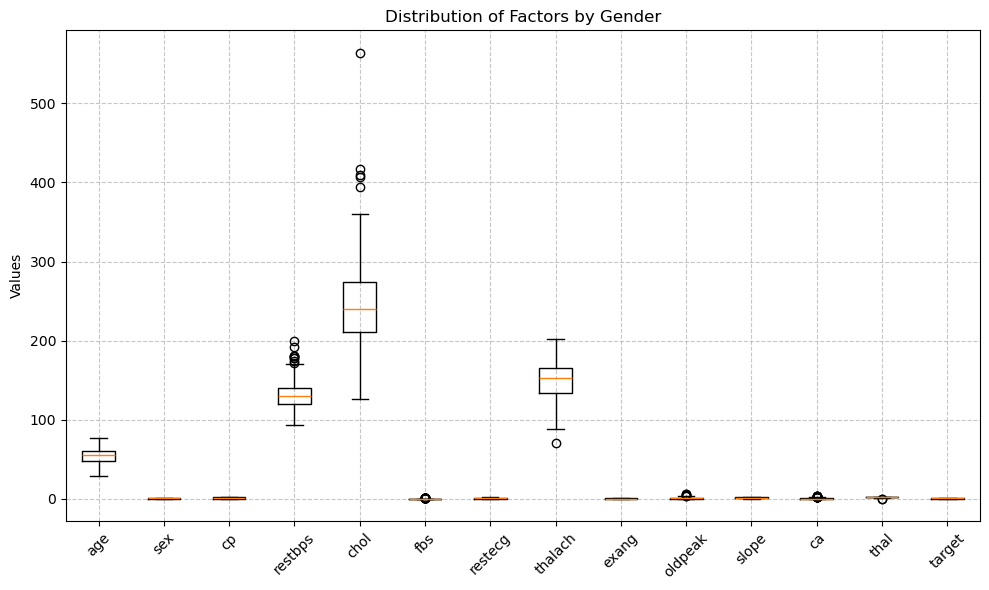

In [15]:
# See the relationship between gender and the other factors
plt.figure(figsize=(10, 6))  # Create a figure with appropriate size
plt.boxplot(newdf, labels=newdf.columns)  # Add column names as labels
plt.title('Distribution of Factors by Gender')  # Add a descriptive title
plt.ylabel('Values')  # Label the y-axis
plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
plt.grid(True, linestyle='--', alpha=0.7)  # Improve grid appearance
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

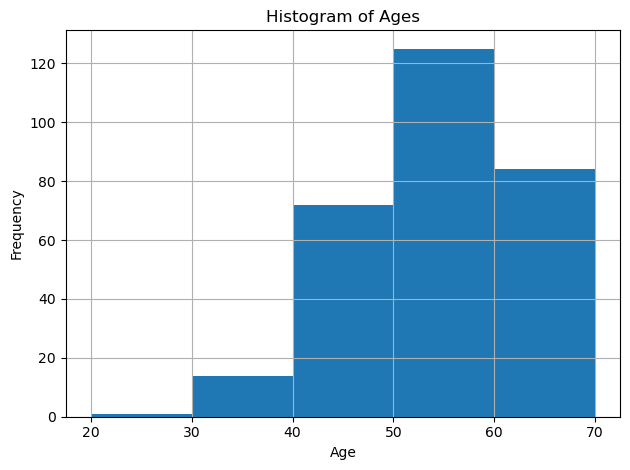

In [16]:
# having an overview of which age group has the most patients
newdf['age'].hist(bins=[20,30,40,50,60,70])
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

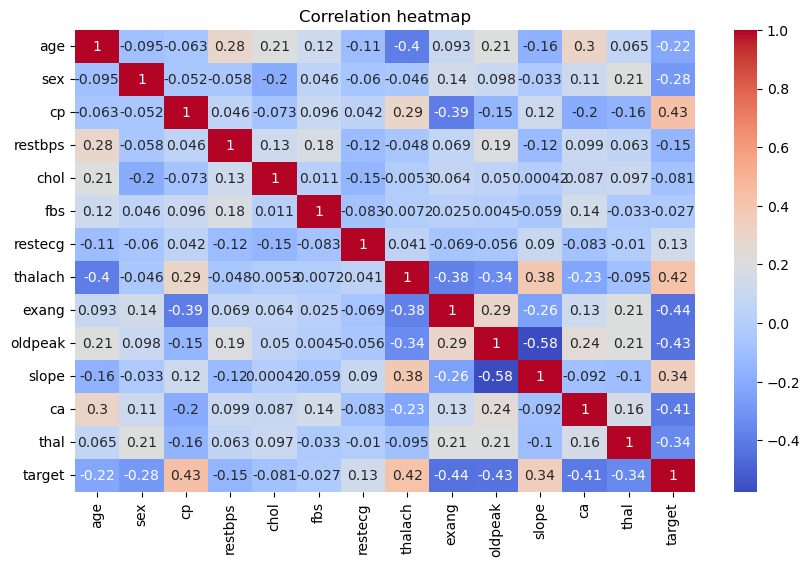

In [17]:
plt.figure(figsize=(10,6))
corr = newdf.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

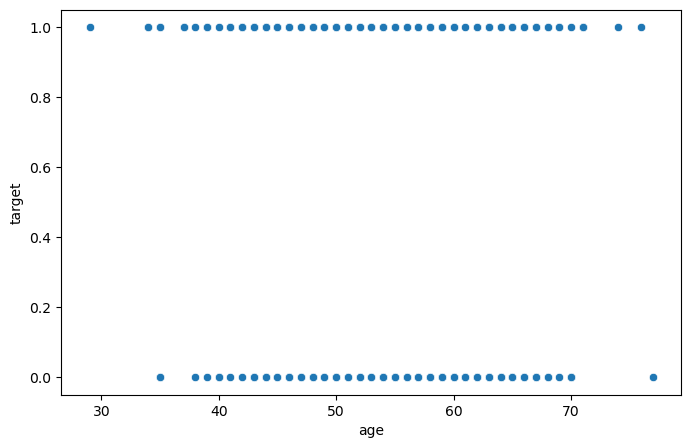

In [31]:
# See the relationship between age and cholesterol

plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='target', data=newdf)
plt.show()

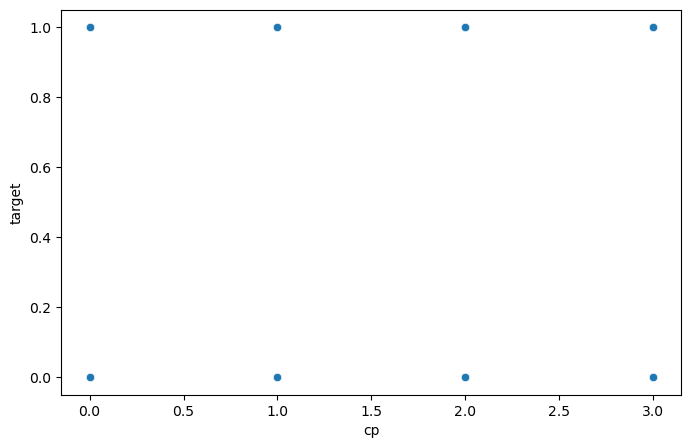

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='cp', y='target', data=newdf)
plt.show()

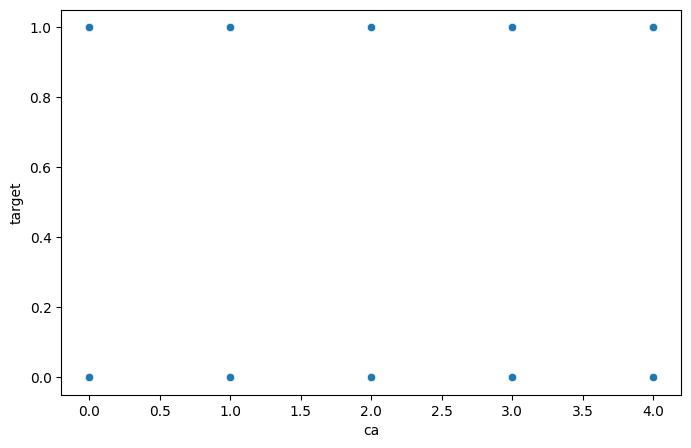

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='ca', y='target', data=newdf)
plt.show()

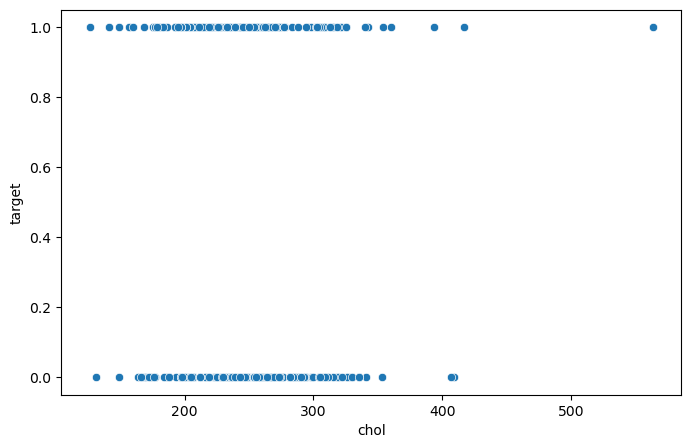

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='chol', y='target', data=newdf)
plt.show()

In [44]:
# Create a logical regression model between chol and present of heart disease
X=newdf[['chol']]
y= newdf['target']
# Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [35]:
import sklearn.metrics as metrics

In [36]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [37]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

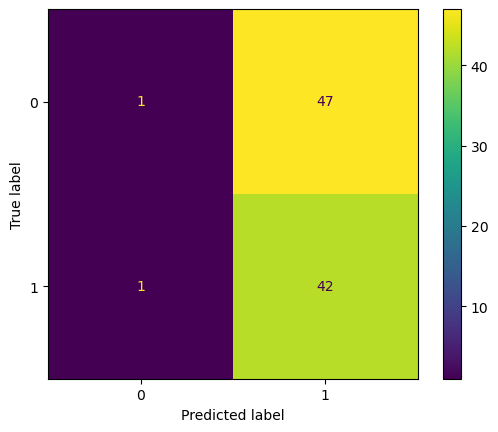

In [38]:
# Display the confusion matrix
disp.plot()

In [46]:
print("cholesterol vs heart diseases")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

cholesterol vs heart diseases
Accuracy: 0.472527
Precision: 0.471910
Recall: 0.976744
F1 Score: 0.636364


In [47]:
# Create a logical regression model between chest pain and patients with heart disease 
X=newdf[['cp']]
y= newdf['target']
# Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [48]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [41]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

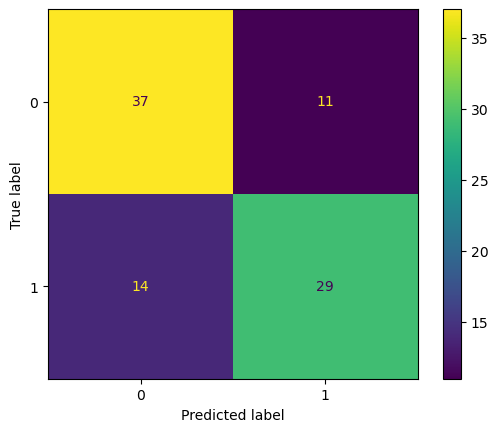

In [42]:
# Display the confusion matrix
disp.plot()

In [49]:
print("chest pain vs heart diseases")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

chest pain vs heart diseases
Accuracy: 0.725275
Precision: 0.725000
Recall: 0.674419
F1 Score: 0.698795


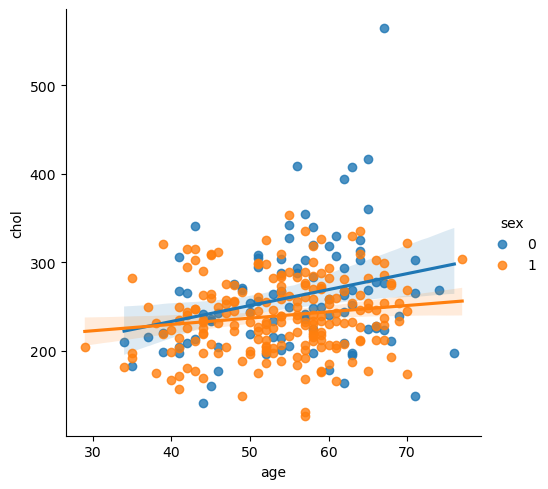

In [30]:
# Plot a graph that show the ages and gender that have high cholesterol
sns.lmplot(x='age', y='chol', hue='sex', data=newdf)
plt.show()

In [50]:
# Create a logical regression model between major vessels(pressume clog arteries) and patients with heart disease 
X=newdf[['ca']]
y= newdf['target']
# Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [51]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [52]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

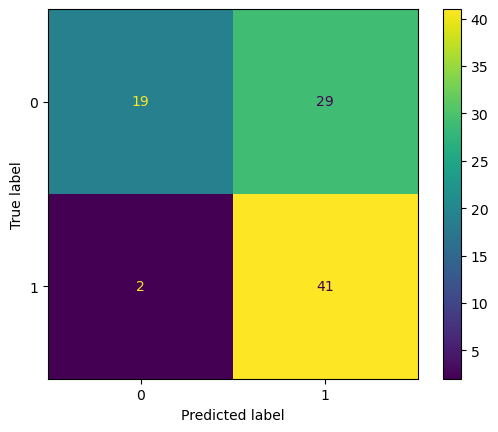

In [53]:
# Display the confusion matrix
disp.plot()

In [54]:
print(" major vessel vs heart diseases")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

 major vessel vs heart diseases
Accuracy: 0.659341
Precision: 0.585714
Recall: 0.953488
F1 Score: 0.725664
